# DATA ANALYSIS PYTHON PROJECT - BLINKIT ANALYSIS

### Import Libraries

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import Raw Data

In [67]:
df = pd.read_csv("D:/code_files/Data Science/Projects/Blinkit data analysis Power BI + SQL + Python + Excel/data/BlinkIT Grocery Data.csv")

## Sample Data

In [69]:
df.head()

,Item_Fat_Content,Item_Identifier,Item_Type,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Item_Visibility,Item_Weight,Total_Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


## Size of the Data

In [71]:
print('size of the data: ',df.shape)

size of the data:  (8523, 12)


## Field info

In [73]:
df.columns

Index(['Item_Fat_Content', 'Item_Identifier', 'Item_Type',
       'Outlet_Establishment_Year', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type', 'Item_Visibility',
       'Item_Weight', 'Total_Sales', 'Rating'],
      dtype='object')

## Data Types

In [75]:
df.dtypes

Item_Fat_Content              object
Item_Identifier               object
Item_Type                     object
Outlet_Establishment_Year      int64
Outlet_Identifier             object
Outlet_Location_Type          object
Outlet_Size                   object
Outlet_Type                   object
Item_Visibility              float64
Item_Weight                  float64
Total_Sales                  float64
Rating                       float64
dtype: object

## Item_Fat_Content cleaning

In [76]:
print(df['Item_Fat_Content'].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


In [77]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})

In [78]:
print(df['Item_Fat_Content'].unique())

['Regular' 'Low Fat']


# BUSINESS REQUIREMENTS

## KPI's REQUIRED

In [93]:
# Total Sales
total_sales = df['Total_Sales'].sum()

# Average Sales
avg_sales = df['Total_Sales'].mean()

# No of Items sold
no_of_items_sold = df['Total_Sales'].count()

# Average Rating
avg_rating = df['Rating'].mean()

In [99]:
print(f"Total Sales: ${total_sales:,.0f}")
print(f"Average Sales: ${total_sales:,.0f}")
print(f"No of Items Sold: {no_of_items_sold:,.0f}")
print(f"Average Rating: {avg_rating:,.1f}")

Total Sales: $1,201,681
Average Sales: $1,201,681
No of Items Sold: 8,523
Average Rating: 4.0


## CHARTS REQUIREMENTS

### Total Sales by Fat Content

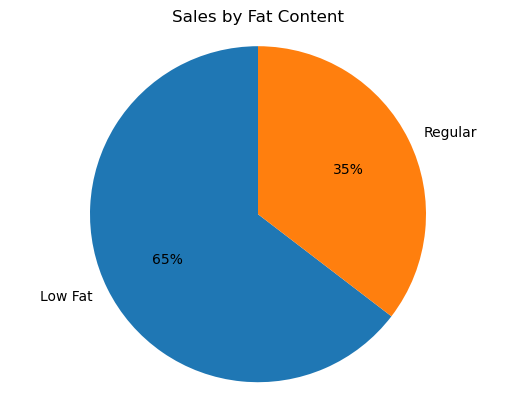

In [107]:
sales_by_fat = df.groupby('Item_Fat_Content')['Total_Sales'].sum()

plt.pie(sales_by_fat, labels = sales_by_fat.index,
            autopct = '%.0f%%',
            startangle = 90)
plt.title("Sales by Fat Content")
plt.axis('equal')
plt.show()

### Total Sales by Item Type

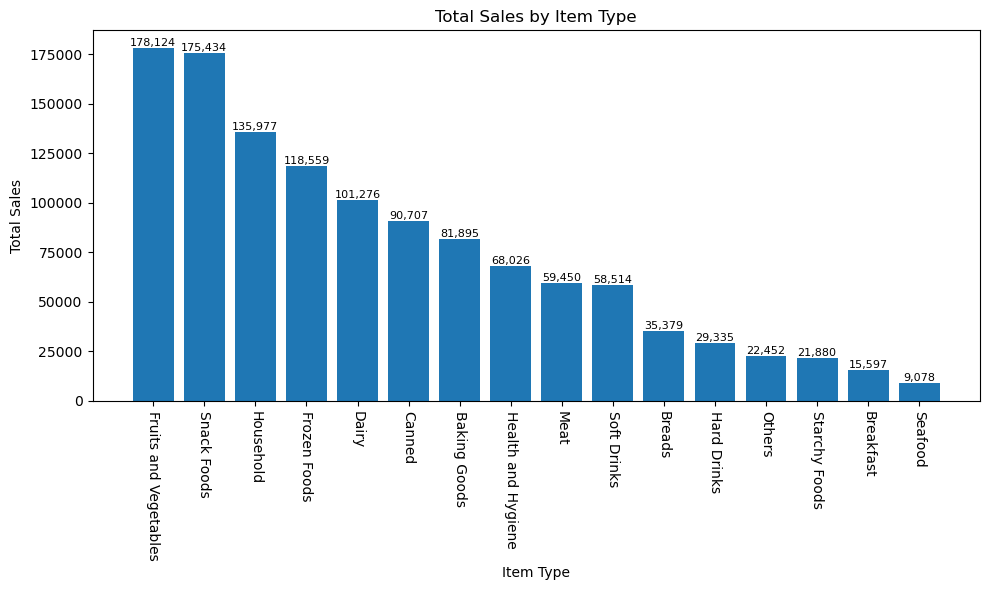

In [112]:
sales_by_type = df.groupby('Item_Type')['Total_Sales'].sum().sort_values(ascending = False)

plt.figure(figsize=(10,6))
bars = plt.bar(sales_by_type.index,sales_by_type.values)

plt.xticks(rotation=-90)
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Item Type')

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{bar.get_height():,.0f}', ha='center', va='bottom', fontsize = 8)

plt.tight_layout()
plt.show()

### Fat content by Outlet for Total Sales

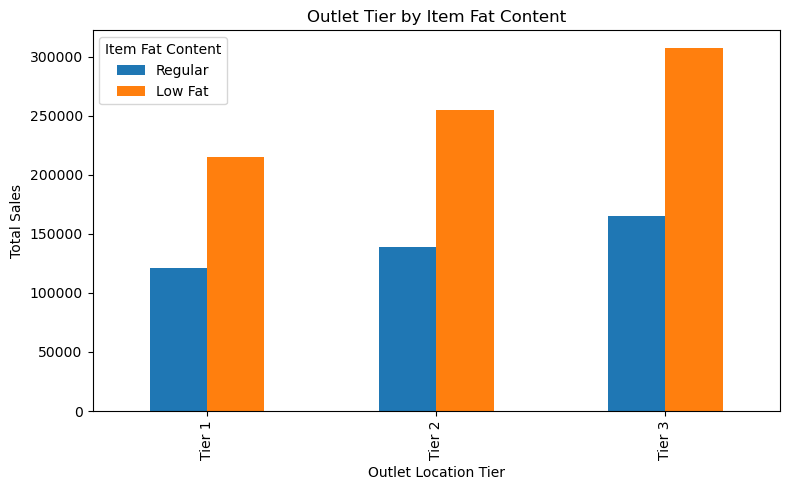

In [121]:
grouped = df.groupby(['Outlet_Location_Type','Item_Fat_Content'])['Total_Sales'].sum().unstack()
grouped = grouped[['Regular', 'Low Fat']]

ax = grouped.plot(kind='bar', figsize=(8,5), title = 'Outlet Tier by Item Fat Content')
plt.xlabel( 'Outlet Location Tier')
plt.ylabel( 'Total Sales')
plt.legend(title = 'Item Fat Content')
plt.tight_layout()
plt.show()

### Total Sales by Outlet Establishment

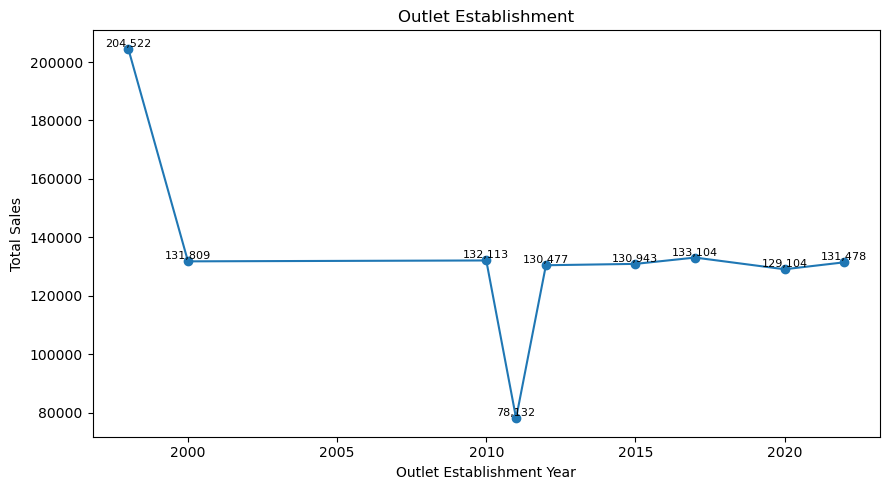

In [126]:
sales_by_year = df.groupby('Outlet_Establishment_Year')['Total_Sales'].sum().sort_index()

plt.figure(figsize=(9,5))
plt.plot(sales_by_year.index, sales_by_year.values, marker = 'o',linestyle='-')

plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.title('Outlet Establishment')

for x, y in zip(sales_by_year.index, sales_by_year.values):
    plt.text(x, y, f'{y:,.0f}', ha = 'center', va = 'bottom', fontsize=8)

plt.tight_layout()
plt.show()

### Total Sales by Outlet Size

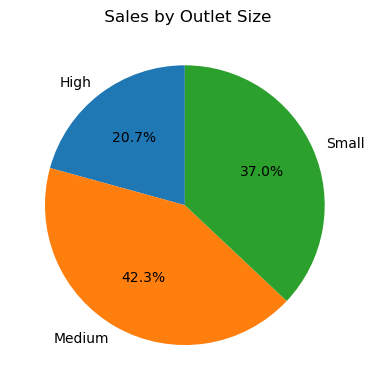

In [132]:
sales_by_size = df.groupby('Outlet_Size')['Total_Sales'].sum()

plt.figure(figsize=(4,4))
plt.pie(sales_by_size, labels = sales_by_size.index, autopct = '%1.1f%%', startangle = 90)
plt.title(" Sales by Outlet Size")
plt.tight_layout()
plt.show()

### Total Sales by Outlet Location

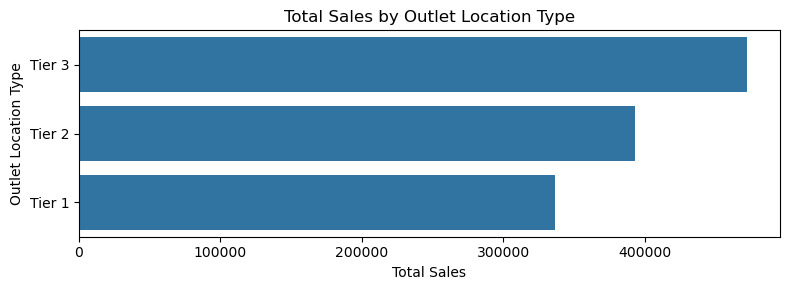

In [144]:
sales_by_location = df.groupby('Outlet_Location_Type')['Total_Sales'].sum().reset_index()
sales_by_location = sales_by_location.sort_values('Total_Sales', ascending = False)

plt.figure(figsize=(8,3)) # Smaller height, enough width
ax = sns.barplot(x='Total_Sales', y= 'Outlet_Location_Type',data=sales_by_location)

plt.title('Total Sales by Outlet Location Type')
plt.xlabel('Total Sales')
plt.ylabel('Outlet Location Type')
plt.tight_layout() # Ensures Layout fits without scroll
plt.show()